In [2]:
from datetime import datetime
import os
import pyopenstates
import sys

def get_state_abbr(state):
    return state.get('abbreviation')


def get_state_name(state):
    return state.get('name')


def query_state(state, search_terms):
    """
    https://openstates.github.io/pyopenstates/pyopenstates%20module.html#pyopenstates.search_bills
    uses keyworded argument in function
    """
    print('Query for ' + state + ' bills')

    bills = pyopenstates.search_bills(state=state, q=search_terms)

    return bills

In [3]:
pyopenstates.set_api_key(KEY HERE)

metadata = pyopenstates.get_metadata()
states = list(map(get_state_abbr, metadata))

In [4]:
search = 'firearms'

states_bills_firearms = {}

for state in states:
    bills = query_state(state, search)
    states_bills_firearms[state] = bills

Query for al bills
Query for ak bills
Query for az bills
Query for ar bills
Query for ca bills
Query for co bills
Query for ct bills
Query for de bills
Query for dc bills
Query for fl bills
Query for ga bills
Query for hi bills
Query for id bills
Query for il bills
Query for in bills
Query for ia bills
Query for ks bills
Query for ky bills
Query for la bills
Query for me bills
Query for md bills
Query for ma bills
Query for mi bills
Query for mn bills
Query for ms bills
Query for mo bills
Query for mt bills
Query for ne bills
Query for nv bills
Query for nh bills
Query for nj bills
Query for nm bills
Query for ny bills
Query for nc bills
Query for nd bills
Query for oh bills
Query for ok bills
Query for or bills
Query for pa bills
Query for pr bills
Query for ri bills
Query for sc bills
Query for sd bills
Query for tn bills
Query for tx bills
Query for ut bills
Query for vt bills
Query for va bills
Query for wa bills
Query for wv bills
Query for wi bills
Query for wy bills


In [5]:
# create dictionary with key of state abbr and value of number of bills
bill_count_by_state = {}

for state in states:
    bill_count_by_state[state] = len(states_bills_firearms[state])
    
print(bill_count_by_state)

{'ct': 64, 'ms': 99, 'md': 192, 'pr': 0, 'wa': 78, 'mn': 106, 'ut': 12, 'co': 11, 'or': 53, 'wy': 7, 'wv': 95, 'nm': 19, 'al': 77, 'ne': 23, 'il': 259, 'sc': 83, 'hi': 139, 'va': 287, 'ny': 354, 'ca': 213, 'wi': 48, 'nh': 41, 'mi': 124, 'nv': 41, 'vt': 28, 'tx': 76, 'ar': 13, 'dc': 12, 'id': 17, 'ma': 69, 'nj': 313, 'mt': 18, 'de': 22, 'me': 38, 'ky': 93, 'nd': 12, 'ok': 273, 'ks': 30, 'pa': 300, 'az': 91, 'nc': 28, 'fl': 119, 'in': 25, 'sd': 27, 'ga': 59, 'la': 100, 'ak': 13, 'ia': 50, 'tn': 284, 'ri': 76, 'oh': 35, 'mo': 115}


In [6]:
# create array of number of bills
values = list(bill_count_by_state.values())
values.sort()

print(values)

# count all bills
total_bills = 0

for value in values:
    total_bills = total_bills + value
    
print(total_bills)

[0, 7, 11, 12, 12, 12, 13, 13, 17, 18, 19, 22, 23, 25, 27, 28, 28, 30, 35, 38, 41, 41, 48, 50, 53, 59, 64, 69, 76, 76, 77, 78, 83, 91, 93, 95, 99, 100, 106, 115, 119, 124, 139, 192, 213, 259, 273, 284, 287, 300, 313, 354]
4761


In [7]:
# create dictionary of with key as state abbr and value as name
state_names = {}

for state in metadata:
    state_names[state.get('abbreviation')] = state.get('name')

print(state_names)
len(state_names)

{'ct': 'Connecticut', 'ms': 'Mississippi', 'md': 'Maryland', 'pr': 'Puerto Rico', 'wa': 'Washington', 'mn': 'Minnesota', 'ut': 'Utah', 'co': 'Colorado', 'or': 'Oregon', 'wy': 'Wyoming', 'wv': 'West Virginia', 'nm': 'New Mexico', 'al': 'Alabama', 'ne': 'Nebraska', 'il': 'Illinois', 'sc': 'South Carolina', 'hi': 'Hawaii', 'va': 'Virginia', 'ny': 'New York', 'ca': 'California', 'wi': 'Wisconsin', 'nh': 'New Hampshire', 'mi': 'Michigan', 'nv': 'Nevada', 'vt': 'Vermont', 'tx': 'Texas', 'ar': 'Arkansas', 'dc': 'District of Columbia', 'id': 'Idaho', 'ma': 'Massachusetts', 'nj': 'New Jersey', 'mt': 'Montana', 'de': 'Delaware', 'me': 'Maine', 'ky': 'Kentucky', 'nd': 'North Dakota', 'ok': 'Oklahoma', 'ks': 'Kansas', 'pa': 'Pennsylvania', 'az': 'Arizona', 'nc': 'North Carolina', 'fl': 'Florida', 'in': 'Indiana', 'sd': 'South Dakota', 'ga': 'Georgia', 'la': 'Louisiana', 'ak': 'Alaska', 'ia': 'Iowa', 'tn': 'Tennessee', 'ri': 'Rhode Island', 'oh': 'Ohio', 'mo': 'Missouri'}


52

In [8]:
# output dictonary where key is state name and value is number of bills for map
bill_count_by_state_name = {}

for state in states:
    bill_count_by_state_name[state_names[state]] = bill_count_by_state[state]
    
print(bill_count_by_state_name)

{'Nevada': 41, 'Alaska': 13, 'Nebraska': 23, 'New Mexico': 19, 'Colorado': 11, 'Pennsylvania': 300, 'Kentucky': 93, 'Washington': 78, 'Vermont': 28, 'Indiana': 25, 'Florida': 119, 'West Virginia': 95, 'Alabama': 77, 'Oregon': 53, 'Georgia': 59, 'Hawaii': 139, 'Maine': 38, 'Wisconsin': 48, 'Texas': 76, 'Arkansas': 13, 'Michigan': 124, 'Utah': 12, 'Puerto Rico': 0, 'North Dakota': 12, 'New Hampshire': 41, 'Kansas': 30, 'Oklahoma': 273, 'South Carolina': 83, 'Wyoming': 7, 'Louisiana': 100, 'Idaho': 17, 'Ohio': 35, 'Maryland': 192, 'Massachusetts': 69, 'District of Columbia': 12, 'Tennessee': 284, 'Virginia': 287, 'Montana': 18, 'California': 213, 'Rhode Island': 76, 'Mississippi': 99, 'New Jersey': 313, 'Arizona': 91, 'Connecticut': 64, 'Iowa': 50, 'Illinois': 259, 'Missouri': 115, 'South Dakota': 27, 'North Carolina': 28, 'Delaware': 22, 'Minnesota': 106, 'New York': 354}


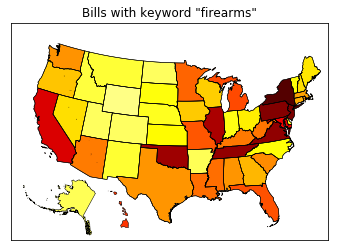

In [9]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

# https://stackoverflow.com/questions/39742305/how-to-use-basemap-python-to-plot-us-with-50-states


# Hawaii has 8 main islands but several tiny atolls that extend for many miles.
# This is the area cutoff between the 8 main islands and the tiny atolls.
ATOLL_CUTOFF = 0.005

m = Basemap(llcrnrlon=-121,llcrnrlat=20,urcrnrlon=-62,urcrnrlat=51,
    projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)

# print(shp_info)
# choose a color for each state based on population density.

# Map with Hawaii and Alaska
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 450 # set range.

# print(m.states_info[0].keys())
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = bill_count_by_state_name[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)

# cycle through state names, color each one.
ax = plt.gca() # get current axes instance

for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        # Offset Alaska and Hawaii to the lower-left corner. 
        if statenames[nshape] == 'Alaska':
        # Alaska is too big. Scale it down to 35% first, then translate it. 
            seg = list(map(lambda s: (0.35*s[0] + 1100000, 0.35*s[1]-1300000), seg))
        if statenames[nshape] == 'Hawaii':
            seg = list(map(lambda s: (s[0] + 5200000, s[1]-1400000), seg))

        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg, facecolor=color, edgecolor='black', linewidth=.5)
        ax.add_patch(poly)

plt.title('Bills with keyword "firearms"')
plt.show()

In [10]:
tx = states_bills_firearms['tx']
print(tx[0])

{'subjects': ['Commerce', 'Animal Rights and Wildlife Issues', 'Budget, Spending, and Taxes', 'Guns'], 'type': ['bill'], 'session': '851', 'id': 'TXB00058778', 'bill_id': 'HB 216', 'title': 'Relating to an exemption from the sales tax for firearms and hunting supplies for a limited period.', 'chamber': 'lower', 'state': 'tx', 'updated_at': datetime.datetime(2017, 8, 1, 5, 30, 49), 'created_at': datetime.datetime(2017, 7, 24, 5, 20, 12)}


In [11]:
bill_count_by_state.get('tx')

76